# PCA Portfolio to track Index
* Show how Principal Component portfolio Can track the Market Index
* Using Industry Index

In [311]:
import investpy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Download 8 Industry Index 2010 - 2020

In [2]:
Set_AGRO = investpy.indices.get_index_historical_data(index = "SET Agro & Food", 
                                                      country = "Thailand",
                                                      from_date = "27/12/2009", 
                                                      to_date = "31/12/2020", 
                                                      as_json=False, 
                                                      order='ascending',
                                                      interval='Weekly')
Set_CONSUMP = investpy.indices.get_index_historical_data(index = "SET Consumer Products", 
                                                         country = "Thailand", 
                                                         from_date = "27/12/2009",
                                                         to_date = "31/12/2020", 
                                                         as_json=False, 
                                                         order='ascending', 
                                                         interval='Weekly')
Set_FINCIAL = investpy.indices.get_index_historical_data(index = "SET Financials", 
                                                         country = "Thailand", 
                                                         from_date = "27/12/2009", 
                                                         to_date = "31/12/2020", 
                                                         as_json=False, 
                                                         order='ascending', 
                                                         interval='Weekly')
Set_INDUS = investpy.indices.get_index_historical_data(index = "SET Industrials", 
                                                       country = "Thailand", 
                                                       from_date = "27/12/2009", 
                                                       to_date = "31/12/2020",
                                                       as_json=False, 
                                                       order='ascending', 
                                                       interval='Weekly')
Set_PROPCON = investpy.indices.get_index_historical_data(index = "Property and Construction", 
                                                         country = "Thailand",
                                                         from_date = "27/12/2009",
                                                         to_date = "31/12/2020", 
                                                         as_json=False, 
                                                         order='ascending', 
                                                         interval='Weekly')
Set_RESOURC = investpy.indices.get_index_historical_data(index = "SET Resources",
                                                         country = "Thailand", 
                                                         from_date = "27/12/2009",
                                                         to_date = "31/12/2020",
                                                         as_json=False, 
                                                         order='ascending', 
                                                         interval='Weekly')
Set_SERVICE = investpy.indices.get_index_historical_data(index = "SET Services",
                                                         country = "Thailand", 
                                                         from_date = "27/12/2009", 
                                                         to_date = "31/12/2020", 
                                                         as_json=False, 
                                                         order='ascending', 
                                                         interval='Weekly')
Set_TECH = investpy.indices.get_index_historical_data(index = "SET Technology", 
                                                      country = "Thailand", 
                                                      from_date = "27/12/2009", 
                                                      to_date = "31/12/2020", 
                                                      as_json=False, 
                                                      order='ascending', 
                                                      interval='Weekly')



### Download Set Index 2010 - 2020


In [408]:
Set= investpy.indices.get_index_historical_data(index = "SET", 
                                                country = "Thailand", 
                                                from_date = "27/12/2009",
                                                to_date = "31/12/2020",
                                                as_json=False, 
                                                order='ascending',
                                                interval='Weekly')
Set

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2009-12-27,732.14,742.31,729.65,734.54,4621584896,THB
2010-01-03,736.66,740.91,725.65,738.96,15481041920,THB
2010-01-10,743.08,753.17,741.40,746.52,15408940032,THB
2010-01-17,744.19,749.65,705.69,714.10,14485363712,THB
2010-01-24,706.76,713.89,682.17,696.55,10755775488,THB
...,...,...,...,...,...,...
2020-11-29,1429.99,1454.94,1408.02,1449.83,129541120000,THB
2020-12-06,1448.08,1503.89,1442.65,1482.67,65274793984,THB
2020-12-13,1491.87,1495.37,1459.97,1482.38,142213988352,THB


### Join the Industry Indexes with Set index

In [313]:
Set_join = Set.copy()
indus_list = ['Set_AGRO','Set_CONSUMP','Set_FINCIAL','Set_INDUS'
              ,'Set_PROPCON','Set_RESOURC','Set_SERVICE','Set_TECH']

for i in indus_list:
    exec('Set_join = Set_join.join({x}[["Close"]] ,  rsuffix="_{x}")'.format(x = i))
    Set_join = Set_join.rename(columns={"Close_{x}".format(x = i): "Return_{x}".format(x = i)})
    
Set_join = Set_join.rename(columns={"Close": "Return_Set"})
included_col = [i for i in Set_join.columns if i not in ['Open','High','Low','Volume','Currency']]
Set_join = Set_join[included_col]

In [314]:
Ret_ind_list = ['Return_' + i for i in indus_list]
Ret_ind_list 

['Return_Set_AGRO',
 'Return_Set_CONSUMP',
 'Return_Set_FINCIAL',
 'Return_Set_INDUS',
 'Return_Set_PROPCON',
 'Return_Set_RESOURC',
 'Return_Set_SERVICE',
 'Return_Set_TECH']

### Calculate Percentage Change

In [315]:
Set_pct_chg = Set_join[['Return_Set'] + Ret_ind_list].pct_change()
Set_pct_chg = Set_pct_chg.dropna()

In [316]:
Set_pct_chg

,Return_Set,Return_Set_AGRO,Return_Set_CONSUMP,Return_Set_FINCIAL,Return_Set_INDUS,Return_Set_PROPCON,Return_Set_RESOURC,Return_Set_SERVICE,Return_Set_TECH
Date,,,,,,,,,
2010-01-03,0.006017,0.029768,0.002664,0.014119,0.027677,-0.011487,0.011955,-0.000794,-0.020995
2010-01-10,0.010231,0.021573,0.005203,-0.004364,0.062987,0.006845,0.008723,0.017080,0.015488
2010-01-17,-0.043428,-0.031042,-0.015969,-0.044662,-0.045964,-0.025929,-0.065709,-0.027924,-0.018902
2010-01-24,-0.024576,-0.022883,-0.010073,-0.009831,-0.006675,-0.035222,-0.034181,-0.026918,-0.022323
2010-01-31,-0.007379,0.005743,0.014924,-0.004744,-0.041052,-0.011608,-0.007546,0.001548,-0.008834
...,...,...,...,...,...,...,...,...,...
2020-11-29,0.008381,-0.006586,-0.002930,0.012482,0.043417,0.012466,0.010066,-0.005705,0.020429
2020-12-06,0.022651,0.012649,-0.019104,0.032163,0.007095,0.014271,0.017501,0.010621,0.080193
2020-12-13,-0.000196,-0.018613,0.023435,0.000200,0.028465,0.004046,-0.005457,-0.005499,0.010172


### Train Test split

In [410]:
Set_only =  Set_pct_chg[['Return_Set']]
Set_indus =  Set_pct_chg[Ret_ind_list]

In [411]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Set_indus ,
                               Set_only,
                               train_size=0.82,
                               random_state=789, 
                               shuffle=False)
print("X_train: " ,X_train.shape)
print("y_train: " ,y_train.shape)
print("X_test: " ,X_test.shape)
print("y_test: " ,y_test.shape)

X_train:  (470, 8)
y_train:  (470, 1)
X_test:  (104, 8)
y_test:  (104, 1)


### Correlation Matrix

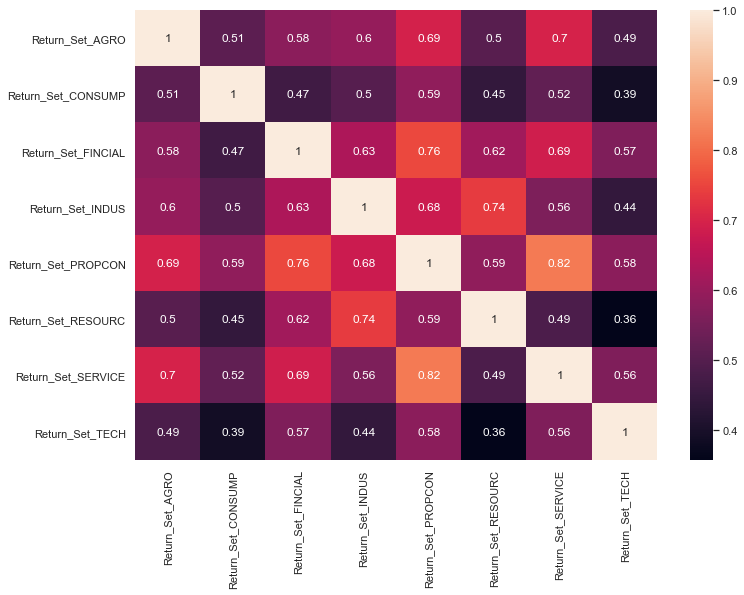

In [412]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = X_train.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

sns.reset_orig()

### Scaled Data

In [413]:
from sklearn.preprocessing import StandardScaler

# fit แค่ train dataset
scaler = StandardScaler()
scaler.fit(X_train)

# transform train dataset
X_train_sc = scaler.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, index=X_train.index, columns = X_train.columns)


# transform test dataset
X_test_sc = scaler.transform(X_test)
X_test_sc  = pd.DataFrame(X_test_sc, index=X_test.index, columns = X_test.columns)


### PCA MODEL

In [414]:
from sklearn.decomposition import PCA

# fit แค่ train dataset
n_component = 8
pca = PCA(n_components=n_component)
pca.fit(X_train_sc)

print("Variance Retained From Each PC :", pca.explained_variance_ratio_)

Variance Retained From Each PC : [0.63252155 0.09657553 0.07715848 0.06231436 0.04882307 0.03313217
 0.03023484 0.01924   ]


In [415]:
# หา Cumulative Variance จาก Components ที่เลือกมาทั้งหมด
print(np.sum(pca.explained_variance_ratio_))

1.0


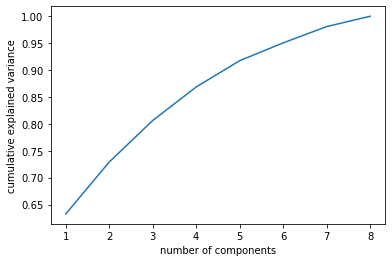

In [416]:
# Plot Cumulative Variance Retained

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()

ax.plot( np.array(range(1,n_component+1)) ,   np.cumsum(pca.explained_variance_ratio_) )
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [417]:
# PCA loadings
pc_columns =  [f"PC_{i+1}" for i in range(n_component)]
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=pc_columns, index=X_train.columns)
loading_matrix

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
Return_Set_AGRO,-0.804076,-0.105074,0.135057,0.353856,-0.386981,0.221500,-0.041106,0.024347
Return_Set_CONSUMP,-0.687949,0.022817,0.652499,-0.306154,0.071375,0.050901,-0.009926,-0.032692
Return_Set_FINCIAL,-0.843225,-0.015688,-0.234724,0.003261,0.342385,0.272068,-0.202112,-0.060449
Return_Set_INDUS,-0.815820,0.391746,-0.097968,-0.055313,-0.170359,-0.258481,-0.260918,-0.080837
Return_Set_PROPCON,-0.909689,-0.104291,0.018607,0.118230,0.162024,-0.161836,0.001239,0.311371
Return_Set_RESOURC,-0.746140,0.548231,-0.167991,-0.098981,-0.023424,0.106290,0.307517,0.020487
Return_Set_SERVICE,-0.850401,-0.266156,0.026847,0.266752,0.145000,-0.188747,0.185913,-0.212179
Return_Set_TECH,-0.683460,-0.476138,-0.283915,-0.427353,-0.206139,-0.004734,0.050467,0.002538


In [418]:
# Visualize Loadings
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


###### input#####

X_input = X_train_sc
y_input = y_train['Return_Set']

######################




features = X_input.columns

components = pca.transform(X_input)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=y_input)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [419]:
from sklearn.decomposition import PCA

n_component = 8


# fit แค่ train dataset
pca = PCA(n_components=n_component)
pca.fit(X_train_sc)

labels = [f"PC_{i+1}" for i in range(n_component)]

# transform Train
X_train_pca= pca.transform(X_train_sc)
X_train_pca = pd.DataFrame(X_train_pca, index=X_train_sc.index, columns = labels)

# transform test
X_test_pca=pca.transform(X_test_sc)
X_test_pca = pd.DataFrame(X_test_pca, index=X_test_sc.index, columns = labels)


print(pca.explained_variance_ratio_)

[0.63252155 0.09657553 0.07715848 0.06231436 0.04882307 0.03313217
 0.03023484 0.01924   ]


In [420]:
X_train_pca

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
Date,,,,,,,,
2010-01-03,-0.557664,1.055126,0.256766,0.754310,-0.677772,0.715358,-0.664458,-0.513621
2010-01-10,-1.628451,0.518659,-0.000562,0.099741,-1.162915,-0.993150,-0.594498,-0.508280
2010-01-17,4.201498,-1.127795,0.363533,-0.140659,-0.076018,-0.464507,-0.503182,0.315484
2010-01-24,2.764146,0.246811,-0.056471,-0.358320,0.018698,0.134384,-1.035692,-0.453837
2010-01-31,0.775176,-0.537213,1.214388,-0.048128,0.210984,0.905274,0.550864,-0.157404
...,...,...,...,...,...,...,...,...
2018-12-02,0.077820,0.080608,-0.393918,0.669730,0.072328,-0.431835,0.460393,-0.528352
2018-12-09,2.800646,-0.344639,0.110458,-0.040759,0.283809,-0.143809,-0.615241,-0.045550
2018-12-16,1.932146,-0.087501,-1.189509,0.388582,0.445739,0.025467,0.404024,-0.134905


<AxesSubplot:title={'center':'First Principal Component of the Set Industrial'}>

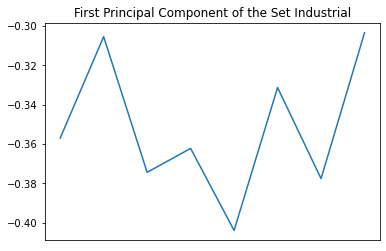

In [421]:
from sklearn.decomposition import PCA
pc1 = pd.Series(index=X_train.columns, data=pca.components_[0])
pc1.plot(xticks=[], title='First Principal Component of the Set Industrial')

In [422]:
pc1

Return_Set_AGRO      -0.357069
Return_Set_CONSUMP   -0.305500
Return_Set_FINCIAL   -0.374454
Return_Set_INDUS     -0.362284
Return_Set_PROPCON   -0.403969
Return_Set_RESOURC   -0.331341
Return_Set_SERVICE   -0.377641
Return_Set_TECH      -0.303506
dtype: float64

# Calculate Weight From PC1 
    * แล้ว นำ Weight มาทำ Portfolio 
    * เทียบ PCA portfolio vs Set Index

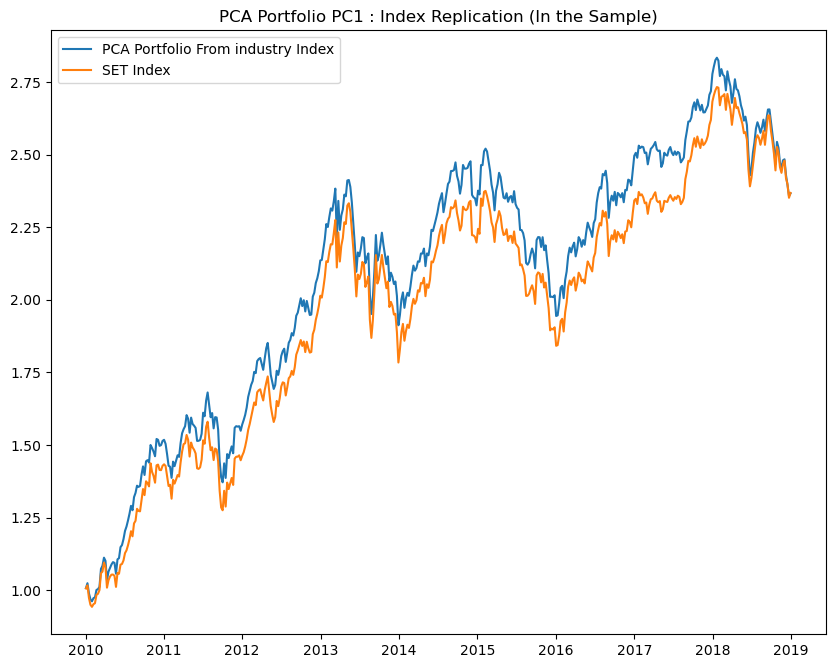

In [423]:
weights = abs(pc1)/sum(abs(pc1))
pca_ret_train = np.sum(weights*X_train, axis = 1)
train_pca_df = pd.concat([pca_ret_train, y_train], 1)
train_pca_df.columns = ["PCA Portfolio From industry Index", "SET Index"]

train_pca_cs = train_pca_df.cumsum().apply(np.exp)
plt.figure(figsize=(10,8), dpi=100)
plt.plot(train_pca_cs["PCA Portfolio From industry Index"] , label="PCA Portfolio From industry Index")
plt.plot(train_pca_cs["SET Index"], label="SET Index")
plt.title("PCA Portfolio PC1 : Index Replication (In the Sample)")
plt.legend()

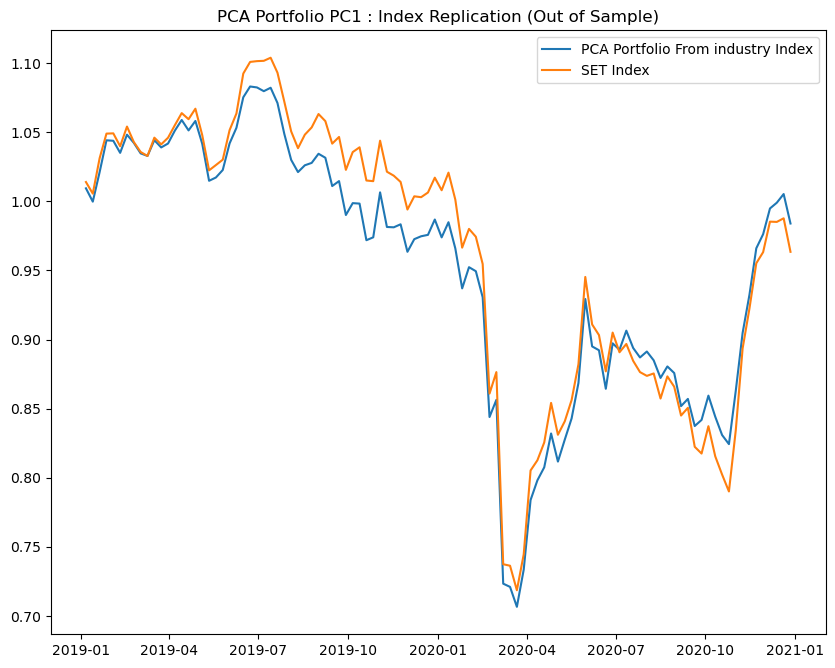

In [424]:
weights = abs(pc1)/sum(abs(pc1))
pca_ret_test = np.sum(weights*X_test, axis = 1)
test_pca_df = pd.concat([pca_ret_test, y_test], 1)
test_pca_df.columns = ["PCA Portfolio From industry Index", "SET Index"]

test_pca_cs = test_pca_df.cumsum().apply(np.exp)
plt.figure(figsize=(10,8), dpi=100)
plt.plot(test_pca_cs["PCA Portfolio From industry Index"] , label="PCA Portfolio From industry Index")
plt.plot(test_pca_cs["SET Index"], label="SET Index")
plt.title("PCA Portfolio PC1 : Index Replication (Out of Sample)")
plt.legend()

# Track AGRO Industry Index

* Agro = Agri Sectors + Food Sectors
* Approximately 60 Stocks There
* First we Download every Stocks Price in these Sector

In [130]:
Agri_stock_list = ["EE",
"GFPT",
"LEE",
"MAX",
"NER",
"PPPM",
"STA",
# "TFM",
"TRUBB",
"TWPC",
"UPOIC",
"UVAN",
"VPO"]




Food_stock_list =["APURE",
"ASIAN",
"BR",
"BRR",
"CBG",
"CFRESH",
"CHOTI",
"CM",
"CPF",
"CPI",
"FND", # F&D
"GLOCON",
"HTC",
"ICHI",
"KBS",
"KSL",
"KTIS",
"LST",
"M",
"MALEE",
"MINT",
# "NRF",
# "NSL",
"OISHI",
"OSP",
"PB",
"PM",
"PRG",
"RBF",
"SAPPE",
"SAUCE",
"SFP",
# "SNNP",
"SNP",
"SORKON",
"SSC",
"SSF",
"SST",
# "SUN",
"TC",
"TFG",
"TFMAMA",
"TIPCO",
"TKN",
"TU",
"TVO",
# "W",
"ZEN"]


## Download Everystock (Almost) in
    * Agri Sector
    * Food Sector

In [215]:
Set_join_agri = Set_AGRO.copy()
date_start = "27/12/2009"
date_end = "31/12/2020"
for i in Agri_stock_list:
    stock = investpy.get_stock_historical_data(stock = i, 
                                                  country = 'Thailand',
                                                  from_date = date_start, 
                                                  to_date = date_end,
                                                  as_json=False,
                                                  order='ascending',
                                                  interval='Weekly')

    exec('Set_join_agri = Set_join_agri.join(stock[["Close"]] ,  rsuffix="_{x}")'.format(x = i))
    Set_join_agri = Set_join_agri.rename(columns={"Close_{x}".format(x = i): "Return_{x}".format(x = i)})
    
Set_join_agri = Set_join_agri.rename(columns={"Close": "Return_Agro"})
included_col = [i for i in Set_join_agri.columns if i not in ['Open','High','Low','Volume','Currency']]
Set_join_agri = Set_join_agri[included_col]

In [216]:
Set_join_food = Set.copy()
date_start = "27/12/2009"
date_end = "31/12/2020"
for i in Food_stock_list:
    stock = investpy.get_stock_historical_data(stock = i, 
                                                  country = 'Thailand',
                                                  from_date = date_start, 
                                                  to_date = date_end,
                                                  as_json=False,
                                                  order='ascending',
                                                  interval='Weekly')

    exec('Set_join_food = Set_join_food.join(stock[["Close"]] ,  rsuffix="_{x}")'.format(x = i))
    Set_join_food = Set_join_food.rename(columns={"Close_{x}".format(x = i): "Return_{x}".format(x = i)})
    
Set_join_food = Set_join_food.rename(columns={"Close": "Return_Agro"})
included_col = [i for i in Set_join_food.columns if i not in ['Open','High','Low','Volume','Currency']]
Set_join_food = Set_join_food[included_col]

In [217]:
Set_join_agri

,Return_Agro,Return_EE,Return_GFPT,Return_LEE,Return_MAX,Return_NER,Return_PPPM,Return_STA,Return_TRUBB,Return_TWPC,Return_UPOIC,Return_UVAN,Return_VPO
Date,,,,,,,,,,,,,
2009-12-27,180.06,1.60,3.85,3.78,0.23,NaN,2.30,4.52,1.04,NaN,6.50,8.28,NaN
2010-01-03,185.42,1.58,3.80,3.68,0.23,NaN,2.30,5.05,1.05,NaN,6.50,8.10,NaN
2010-01-10,189.42,1.56,3.95,3.66,0.24,NaN,2.34,5.50,1.20,NaN,6.60,8.25,NaN
2010-01-17,183.54,1.38,4.17,3.68,0.28,NaN,2.26,5.05,1.16,NaN,6.45,8.10,NaN
2010-01-24,179.34,1.32,4.08,3.56,0.24,NaN,2.22,5.20,1.18,NaN,6.25,7.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-29,441.94,0.64,13.40,2.34,0.01,4.50,0.17,26.25,1.83,3.96,4.14,5.10,0.44
2020-12-06,447.53,0.66,13.70,2.34,0.01,4.32,0.16,25.50,1.79,4.14,4.02,5.20,0.45
2020-12-13,439.20,0.65,14.50,2.36,0.01,4.32,0.16,25.75,1.73,4.12,4.28,5.60,0.47


In [218]:
Set_join_food

,Return_Agro,Return_APURE,Return_ASIAN,Return_BR,Return_BRR,Return_CBG,Return_CFRESH,Return_CHOTI,Return_CM,Return_CPF,...,Return_SSF,Return_SST,Return_TC,Return_TFG,Return_TFMAMA,Return_TIPCO,Return_TKN,Return_TU,Return_TVO,Return_ZEN
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-27,734.54,0.89,3.38,NaN,NaN,NaN,3.76,NaN,4.40,11.40,...,6.95,2.56,2.77,NaN,NaN,4.78,NaN,NaN,17.80,NaN
2010-01-03,738.96,0.89,3.42,NaN,NaN,NaN,3.80,136.00,4.52,11.70,...,7.20,2.50,2.83,NaN,NaN,4.66,NaN,NaN,18.20,NaN
2010-01-10,746.52,0.88,3.42,NaN,NaN,NaN,3.82,135.00,4.68,12.50,...,8.75,2.56,3.00,NaN,NaN,4.58,NaN,NaN,18.40,NaN
2010-01-17,714.10,0.85,3.22,NaN,NaN,NaN,3.74,136.00,4.56,12.00,...,8.80,2.58,2.80,NaN,NaN,4.52,NaN,NaN,17.50,NaN
2010-01-24,696.55,0.84,3.00,NaN,NaN,NaN,3.58,133.00,4.52,11.50,...,8.55,2.46,2.60,NaN,NaN,4.44,NaN,NaN,16.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-29,1449.83,2.20,12.10,2.30,3.12,119.0,3.12,70.00,2.60,28.25,...,7.50,2.11,5.00,5.05,194.5,7.05,11.8,15.1,32.00,12.0
2020-12-06,1482.67,2.10,11.50,2.38,3.12,118.0,3.00,70.75,2.60,28.50,...,6.80,2.10,4.86,5.00,194.0,7.15,11.4,14.7,31.50,12.5
2020-12-13,1482.38,2.40,11.50,2.30,3.16,114.0,2.88,71.00,2.74,27.50,...,7.25,2.13,4.86,5.20,195.0,7.45,11.5,14.6,32.25,12.5


In [234]:
Set_join_agro = Set_join_agri.join(Set_join_food , rsuffix = 'r').drop("Return_Agror",axis = 1)
Set_join_agro = Set_join_agro.fillna(method="backfill")


In [235]:
Set_ret_agro = Set_join_agro.pct_change().dropna()
Set_ret_agro

,Return_Agro,Return_EE,Return_GFPT,Return_LEE,Return_MAX,Return_NER,Return_PPPM,Return_STA,Return_TRUBB,Return_TWPC,...,Return_SSF,Return_SST,Return_TC,Return_TFG,Return_TFMAMA,Return_TIPCO,Return_TKN,Return_TU,Return_TVO,Return_ZEN
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-03,0.029768,-0.012500,-0.012987,-0.026455,0.000000,0.000000,0.000000,0.117257,0.009615,0.000000,...,0.035971,-0.023438,0.021661,0.000000,0.000000,-0.025105,0.000000,0.000000,0.022472,0.000000
2010-01-10,0.021573,-0.012658,0.039474,-0.005435,0.043478,0.000000,0.017391,0.089109,0.142857,0.000000,...,0.215278,0.024000,0.060071,0.000000,0.000000,-0.017167,0.000000,0.000000,0.010989,0.000000
2010-01-17,-0.031042,-0.115385,0.055696,0.005464,0.166667,0.000000,-0.034188,-0.081818,-0.033333,0.000000,...,0.005714,0.007812,-0.066667,0.000000,0.000000,-0.013100,0.000000,0.000000,-0.048913,0.000000
2010-01-24,-0.022883,-0.043478,-0.021583,-0.032609,-0.142857,0.000000,-0.017699,0.029703,0.017241,0.000000,...,-0.028409,-0.046512,-0.071429,0.000000,0.000000,-0.017699,0.000000,0.000000,-0.034286,0.000000
2010-01-31,0.005743,-0.090909,0.009804,0.000000,-0.041667,0.000000,-0.018018,-0.069231,-0.008475,0.000000,...,-0.017544,0.012195,-0.030769,0.000000,0.000000,-0.036036,0.000000,0.000000,-0.011834,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-29,-0.006586,0.032258,-0.014706,0.008621,0.000000,0.046512,0.000000,-0.036697,0.063953,0.070270,...,0.071429,-0.009390,-0.056604,0.014056,0.005168,-0.020833,0.063063,-0.013072,-0.007752,-0.016393
2020-12-06,0.012649,0.031250,0.022388,0.000000,0.000000,-0.040000,-0.058824,-0.028571,-0.021858,0.045455,...,-0.093333,-0.004739,-0.028000,-0.009901,-0.002571,0.014184,-0.033898,-0.026490,-0.015625,0.041667
2020-12-13,-0.018613,-0.015152,0.058394,0.008547,0.000000,0.000000,0.000000,0.009804,-0.033520,-0.004831,...,0.066176,0.014286,0.000000,0.040000,0.005155,0.041958,0.008772,-0.006803,0.023810,0.000000


In [237]:
Set_agro = Set_ret_agro.drop("Return_Agro",axis =1)
Set_indx = Set_ret_agro[["Return_Agro"]]
Set_agro

,Return_EE,Return_GFPT,Return_LEE,Return_MAX,Return_NER,Return_PPPM,Return_STA,Return_TRUBB,Return_TWPC,Return_UPOIC,...,Return_SSF,Return_SST,Return_TC,Return_TFG,Return_TFMAMA,Return_TIPCO,Return_TKN,Return_TU,Return_TVO,Return_ZEN
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-03,-0.012500,-0.012987,-0.026455,0.000000,0.000000,0.000000,0.117257,0.009615,0.000000,0.000000,...,0.035971,-0.023438,0.021661,0.000000,0.000000,-0.025105,0.000000,0.000000,0.022472,0.000000
2010-01-10,-0.012658,0.039474,-0.005435,0.043478,0.000000,0.017391,0.089109,0.142857,0.000000,0.015385,...,0.215278,0.024000,0.060071,0.000000,0.000000,-0.017167,0.000000,0.000000,0.010989,0.000000
2010-01-17,-0.115385,0.055696,0.005464,0.166667,0.000000,-0.034188,-0.081818,-0.033333,0.000000,-0.022727,...,0.005714,0.007812,-0.066667,0.000000,0.000000,-0.013100,0.000000,0.000000,-0.048913,0.000000
2010-01-24,-0.043478,-0.021583,-0.032609,-0.142857,0.000000,-0.017699,0.029703,0.017241,0.000000,-0.031008,...,-0.028409,-0.046512,-0.071429,0.000000,0.000000,-0.017699,0.000000,0.000000,-0.034286,0.000000
2010-01-31,-0.090909,0.009804,0.000000,-0.041667,0.000000,-0.018018,-0.069231,-0.008475,0.000000,0.016000,...,-0.017544,0.012195,-0.030769,0.000000,0.000000,-0.036036,0.000000,0.000000,-0.011834,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-29,0.032258,-0.014706,0.008621,0.000000,0.046512,0.000000,-0.036697,0.063953,0.070270,0.040201,...,0.071429,-0.009390,-0.056604,0.014056,0.005168,-0.020833,0.063063,-0.013072,-0.007752,-0.016393
2020-12-06,0.031250,0.022388,0.000000,0.000000,-0.040000,-0.058824,-0.028571,-0.021858,0.045455,-0.028986,...,-0.093333,-0.004739,-0.028000,-0.009901,-0.002571,0.014184,-0.033898,-0.026490,-0.015625,0.041667
2020-12-13,-0.015152,0.058394,0.008547,0.000000,0.000000,0.000000,0.009804,-0.033520,-0.004831,0.064677,...,0.066176,0.014286,0.000000,0.040000,0.005155,0.041958,0.008772,-0.006803,0.023810,0.000000


In [371]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Set_agro ,
                               Set_indx,
                               train_size=0.85,
                               random_state=789, 
                               shuffle=False)

print("X_train: " ,X_train.shape)
print("y_train: " ,y_train.shape)
print("X_test: " ,X_test.shape)
print("y_test: " ,y_test.shape)

X_train:  (487, 55)
y_train:  (487, 1)
X_test:  (87, 55)
y_test:  (87, 1)


In [372]:
from scipy.stats import iqr
X_train2 = X_train.copy()
upper_dict = {}
lower_dict = {}

for i in X_train.columns:
    upper = X_train[i].quantile(0.90) + (1.5 * iqr(X_train[['Return_GFPT']]))
    lower = X_train[i].quantile(0.10) - (1.5 * iqr(X_train[['Return_GFPT']]))
    upper_dict[i] = upper
    lower_dict[i] = lower

In [373]:
X_train

,Return_EE,Return_GFPT,Return_LEE,Return_MAX,Return_NER,Return_PPPM,Return_STA,Return_TRUBB,Return_TWPC,Return_UPOIC,...,Return_SSF,Return_SST,Return_TC,Return_TFG,Return_TFMAMA,Return_TIPCO,Return_TKN,Return_TU,Return_TVO,Return_ZEN
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-03,-0.012500,-0.012987,-0.026455,0.000000,0.000000,0.000000,0.117257,0.009615,0.000000,0.000000,...,0.035971,-0.023438,0.021661,0.000000,0.000000,-0.025105,0.000000,0.000000,0.022472,0.000000
2010-01-10,-0.012658,0.039474,-0.005435,0.043478,0.000000,0.017391,0.089109,0.142857,0.000000,0.015385,...,0.215278,0.024000,0.060071,0.000000,0.000000,-0.017167,0.000000,0.000000,0.010989,0.000000
2010-01-17,-0.115385,0.055696,0.005464,0.166667,0.000000,-0.034188,-0.081818,-0.033333,0.000000,-0.022727,...,0.005714,0.007812,-0.066667,0.000000,0.000000,-0.013100,0.000000,0.000000,-0.048913,0.000000
2010-01-24,-0.043478,-0.021583,-0.032609,-0.142857,0.000000,-0.017699,0.029703,0.017241,0.000000,-0.031008,...,-0.028409,-0.046512,-0.071429,0.000000,0.000000,-0.017699,0.000000,0.000000,-0.034286,0.000000
2010-01-31,-0.090909,0.009804,0.000000,-0.041667,0.000000,-0.018018,-0.069231,-0.008475,0.000000,0.016000,...,-0.017544,0.012195,-0.030769,0.000000,0.000000,-0.036036,0.000000,0.000000,-0.011834,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-31,-0.052632,0.057143,-0.016000,0.000000,0.008000,-0.011628,0.007812,0.006993,-0.012048,-0.009091,...,0.015152,-0.002513,0.005181,0.020000,0.003115,0.019481,-0.005319,-0.041451,0.000000,0.000000
2019-04-07,-0.018519,-0.013514,0.016260,0.000000,0.039683,0.011765,0.031008,0.000000,0.000000,0.013761,...,0.044776,0.000000,-0.025773,-0.019608,-0.006211,0.057325,0.037433,0.005405,0.028037,-0.006757
2019-04-14,0.018868,0.020548,0.000000,0.000000,-0.007634,-0.023256,0.015038,0.006944,0.012195,-0.018100,...,0.000000,0.015113,-0.037037,0.013333,0.000000,0.012048,0.030928,0.010753,-0.009091,0.034014


In [374]:
# Replace outlier

X_train_no = X_train.copy()
X_test_no = X_test.copy()

for i in X_train_no.columns:
    X_train_no[i] = np.where(X_train_no[i]> upper_dict[i] , upper_dict[i] , X_train_no[i])
    X_train_no[i] = np.where(X_train_no[i]< lower_dict[i] , lower_dict[i] , X_train_no[i])

for i in X_test_no.columns:
    X_test_no[i] = np.where(X_test_no[i]> upper_dict[i] , upper_dict[i] , X_test_no[i])
    X_test_no[i] = np.where(X_test_no[i]< lower_dict[i] , lower_dict[i] , X_test_no[i])




In [375]:

from sklearn.preprocessing import StandardScaler

# fit แค่ train dataset
scaler = StandardScaler()
scaler.fit(X_train_no)

# transform train dataset
X_train_sc = scaler.transform(X_train_no)
X_train_sc = pd.DataFrame(X_train_sc, index=X_train_no.index, columns = X_train_no.columns)


# transform test dataset
X_test_sc = scaler.transform(X_test_no)
X_test_sc  = pd.DataFrame(X_test_sc, index=X_test_no.index, columns = X_test_no.columns)


In [376]:
from sklearn.decomposition import PCA

# fit แค่ train dataset
n_component = 55
pca = PCA(n_components=n_component)
pca.fit(X_train_sc)

print("Variance Retained From Each PC :", pca.explained_variance_ratio_)

Variance Retained From Each PC : [1.46503855e-01 4.39718631e-02 3.20257097e-02 2.97464941e-02
 2.75992373e-02 2.59169486e-02 2.48731824e-02 2.44333494e-02
 2.38386501e-02 2.32093697e-02 2.24062074e-02 2.19620686e-02
 2.14760659e-02 2.09286916e-02 2.01826598e-02 1.94068452e-02
 1.93122762e-02 1.86217515e-02 1.82355202e-02 1.80892393e-02
 1.70584840e-02 1.66538278e-02 1.66341495e-02 1.59570414e-02
 1.55832367e-02 1.52697912e-02 1.51213071e-02 1.48520221e-02
 1.46952894e-02 1.39767944e-02 1.36064141e-02 1.33142553e-02
 1.30764728e-02 1.26346571e-02 1.21919170e-02 1.18001026e-02
 1.16016512e-02 1.13807863e-02 1.09889094e-02 1.08177312e-02
 1.05056819e-02 1.01925779e-02 9.72417766e-03 9.66509306e-03
 9.54444732e-03 9.11913197e-03 8.82666124e-03 8.46788571e-03
 8.23017352e-03 7.93963358e-03 7.42609572e-03 7.37113781e-03
 6.92222114e-03 6.11025557e-03 4.66640569e-33]


In [377]:
# หา Cumulative Variance จาก Components ที่เลือกมาทั้งหมด
print(np.sum(pca.explained_variance_ratio_))

1.0


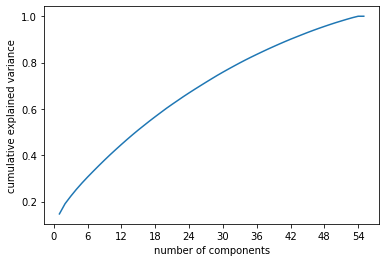

In [378]:
# Plot Cumulative Variance Retained

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()

ax.plot( np.array(range(1,n_component+1)) ,   np.cumsum(pca.explained_variance_ratio_) )
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [379]:
# PCA loadings
pc_columns =  [f"PC_{i+1}" for i in range(n_component)]
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=pc_columns, index=X_train.columns)
loading_matrix

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55
Return_EE,-0.435426,0.155571,-1.526444e-01,1.057492e-01,1.340833e-02,-1.807025e-01,-2.454008e-02,-1.952385e-01,0.007962,-6.237678e-02,...,-2.494573e-02,7.550766e-02,-3.588973e-02,1.693662e-01,-5.080392e-02,0.010152,4.768552e-02,-3.352125e-02,2.338480e-02,-0.000000e+00
Return_GFPT,-0.423820,-0.044082,3.964736e-02,-1.648663e-01,8.152392e-02,-1.394420e-01,-3.779022e-01,1.643458e-01,0.230762,-1.973982e-02,...,-6.586865e-02,1.542027e-01,1.766460e-02,4.484577e-02,-7.684926e-02,-0.066022,9.177455e-02,-4.698182e-03,-2.997969e-02,-2.347731e-32
Return_LEE,-0.468851,0.136341,-1.270911e-01,-2.050184e-02,-1.397138e-01,-8.268630e-02,1.417520e-02,-1.514691e-01,-0.056982,1.376687e-01,...,3.533601e-02,-7.206812e-04,-1.653571e-02,7.785431e-02,1.992375e-01,0.041269,-1.082122e-02,-9.422586e-02,4.466858e-02,-1.731609e-32
Return_MAX,-0.253186,0.211062,-1.516955e-01,1.967049e-03,-2.900445e-01,-1.281826e-01,-2.031916e-01,7.195511e-02,-0.120722,-3.538574e-01,...,-7.976295e-02,4.421086e-02,-8.149309e-02,-1.181167e-01,8.670842e-02,0.023129,-5.764002e-02,-3.994839e-02,-1.455122e-02,-1.588712e-32
Return_NER,-0.135953,-0.323173,-2.219326e-01,-8.509818e-02,9.063653e-02,-3.296482e-01,2.931280e-01,1.797654e-01,-0.018894,1.123698e-01,...,-3.483634e-02,-2.640961e-02,-4.022579e-02,4.211634e-02,-3.579953e-02,-0.053416,-2.911825e-02,-7.202635e-02,-7.684043e-03,1.475028e-32
Return_PPPM,-0.491958,-0.164936,1.800650e-02,-1.007533e-02,-1.368742e-01,-2.944999e-01,9.835935e-02,-9.630140e-02,-0.131395,8.045640e-02,...,-1.394717e-01,-1.676984e-01,3.151214e-02,1.298269e-02,-1.230915e-01,-0.049234,3.738855e-02,-3.365119e-02,-5.777104e-02,-8.548972e-33
Return_STA,-0.558859,0.075164,2.848271e-01,8.501731e-02,2.889488e-01,-2.067785e-01,5.119560e-02,4.679580e-02,-0.226894,9.409066e-02,...,3.758122e-02,1.282275e-01,-8.548800e-02,-8.342669e-02,-1.160964e-01,0.009149,-7.506239e-02,-9.562574e-02,3.500602e-01,1.940601e-32
Return_TRUBB,-0.549257,0.061207,3.223991e-01,1.329341e-01,8.008211e-02,-2.400795e-01,-2.344743e-04,1.090931e-01,-0.087340,5.337152e-03,...,1.071298e-02,-3.678881e-02,3.896339e-02,3.972591e-02,1.408086e-01,0.138912,1.315408e-01,4.061602e-03,-2.579047e-01,-4.571813e-33
Return_TWPC,-0.190172,-0.278419,-1.316231e-02,8.205868e-02,9.117203e-02,4.333983e-01,4.356058e-02,-2.307810e-01,-0.140130,1.023832e-02,...,2.461813e-02,4.969521e-02,-3.992563e-02,-6.271118e-03,4.352475e-02,-0.091444,3.636185e-02,-2.164909e-02,-6.439519e-03,1.928936e-32
Return_UPOIC,-0.472454,0.145788,2.602245e-01,8.456831e-02,-1.007339e-01,2.860559e-01,-4.442019e-02,3.275644e-01,0.002874,1.778941e-02,...,-2.877340e-02,-6.391936e-02,-6.540784e-02,7.449878e-02,-9.088644e-02,-0.190479,1.784283e-01,2.044772e-02,4.333635e-02,3.936854e-33


In [380]:
# Visualize Loadings
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

###### input#####

X_input = X_train_sc
y_input = y_train['Return_Agro']

######################



features = X_input.columns

components = pca.transform(X_input)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=y_input)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()


In [381]:
from sklearn.decomposition import PCA

n_component = 1


# fit แค่ train dataset
pca = PCA(n_components=n_component)
pca.fit(X_train_sc)

labels = [f"PC_{i+1}" for i in range(n_component)]

# transform Train
X_train_pca= pca.transform(X_train_sc)
X_train_pca = pd.DataFrame(X_train_pca, index=X_train_sc.index, columns = labels)

# transform test
X_test_pca=pca.transform(X_test_sc)
X_test_pca = pd.DataFrame(X_test_pca, index=X_test_sc.index, columns = labels)


print(pca.explained_variance_ratio_)

[0.14650386]


<AxesSubplot:title={'center':'First Principal Component of the Set AGRO Stock'}>

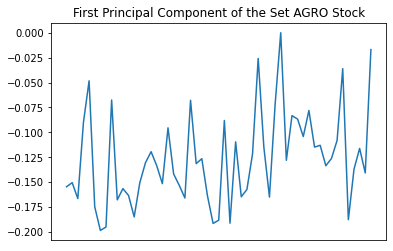

In [382]:

from sklearn.decomposition import PCA
# pca = PCA(1).fit(rs.fillna(0))
pc1 = pd.Series(index=X_train.columns, data=pca.components_[0])
pc1.plot(xticks=[], title='First Principal Component of the Set AGRO Stock')


In [383]:
X_train

,Return_EE,Return_GFPT,Return_LEE,Return_MAX,Return_NER,Return_PPPM,Return_STA,Return_TRUBB,Return_TWPC,Return_UPOIC,...,Return_SSF,Return_SST,Return_TC,Return_TFG,Return_TFMAMA,Return_TIPCO,Return_TKN,Return_TU,Return_TVO,Return_ZEN
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-03,-0.012500,-0.012987,-0.026455,0.000000,0.000000,0.000000,0.117257,0.009615,0.000000,0.000000,...,0.035971,-0.023438,0.021661,0.000000,0.000000,-0.025105,0.000000,0.000000,0.022472,0.000000
2010-01-10,-0.012658,0.039474,-0.005435,0.043478,0.000000,0.017391,0.089109,0.142857,0.000000,0.015385,...,0.215278,0.024000,0.060071,0.000000,0.000000,-0.017167,0.000000,0.000000,0.010989,0.000000
2010-01-17,-0.115385,0.055696,0.005464,0.166667,0.000000,-0.034188,-0.081818,-0.033333,0.000000,-0.022727,...,0.005714,0.007812,-0.066667,0.000000,0.000000,-0.013100,0.000000,0.000000,-0.048913,0.000000
2010-01-24,-0.043478,-0.021583,-0.032609,-0.142857,0.000000,-0.017699,0.029703,0.017241,0.000000,-0.031008,...,-0.028409,-0.046512,-0.071429,0.000000,0.000000,-0.017699,0.000000,0.000000,-0.034286,0.000000
2010-01-31,-0.090909,0.009804,0.000000,-0.041667,0.000000,-0.018018,-0.069231,-0.008475,0.000000,0.016000,...,-0.017544,0.012195,-0.030769,0.000000,0.000000,-0.036036,0.000000,0.000000,-0.011834,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-31,-0.052632,0.057143,-0.016000,0.000000,0.008000,-0.011628,0.007812,0.006993,-0.012048,-0.009091,...,0.015152,-0.002513,0.005181,0.020000,0.003115,0.019481,-0.005319,-0.041451,0.000000,0.000000
2019-04-07,-0.018519,-0.013514,0.016260,0.000000,0.039683,0.011765,0.031008,0.000000,0.000000,0.013761,...,0.044776,0.000000,-0.025773,-0.019608,-0.006211,0.057325,0.037433,0.005405,0.028037,-0.006757
2019-04-14,0.018868,0.020548,0.000000,0.000000,-0.007634,-0.023256,0.015038,0.006944,0.012195,-0.018100,...,0.000000,0.015113,-0.037037,0.013333,0.000000,0.012048,0.030928,0.010753,-0.009091,0.034014


In [384]:
y_train

,Return_Agro
Date,
2010-01-03,0.029768
2010-01-10,0.021573
2010-01-17,-0.031042
2010-01-24,-0.022883
2010-01-31,0.005743
...,...
2019-03-31,-0.003531
2019-04-07,-0.000513
2019-04-14,0.013376


In [387]:
pca_ret_train

Date
2010-01-03    0.006254
2010-01-10    0.018193
2010-01-17   -0.016295
2010-01-24   -0.015085
2010-01-31   -0.002411
                ...   
2019-03-31   -0.000929
2019-04-07    0.003282
2019-04-14    0.011367
2019-04-21   -0.007066
2019-04-28    0.003194
Length: 487, dtype: float64

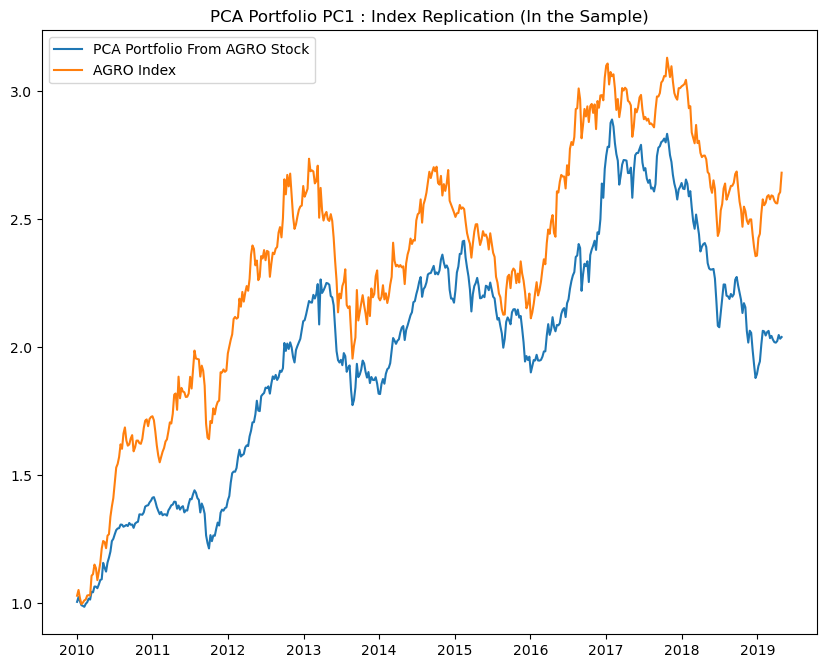

In [407]:

weights = abs(pc1)/sum(abs(pc1))
pca_ret_train = np.sum(weights*X_train, axis = 1)
train_pca_df = pd.concat([pca_ret_train, y_train], 1)
train_pca_df.columns = ["PCA Portfolio From AGRO Stock", "AGRO Index"]

train_pca_cs = train_pca_df.cumsum().apply(np.exp)
plt.figure(figsize=(10,8), dpi=100)
plt.plot(train_pca_cs["PCA Portfolio From AGRO Stock"] , label="PCA Portfolio From AGRO Stock")
plt.plot(train_pca_cs["AGRO Index"], label="AGRO Index")
plt.title("PCA Portfolio PC1 : Index Replication (In the Sample)")
plt.legend()

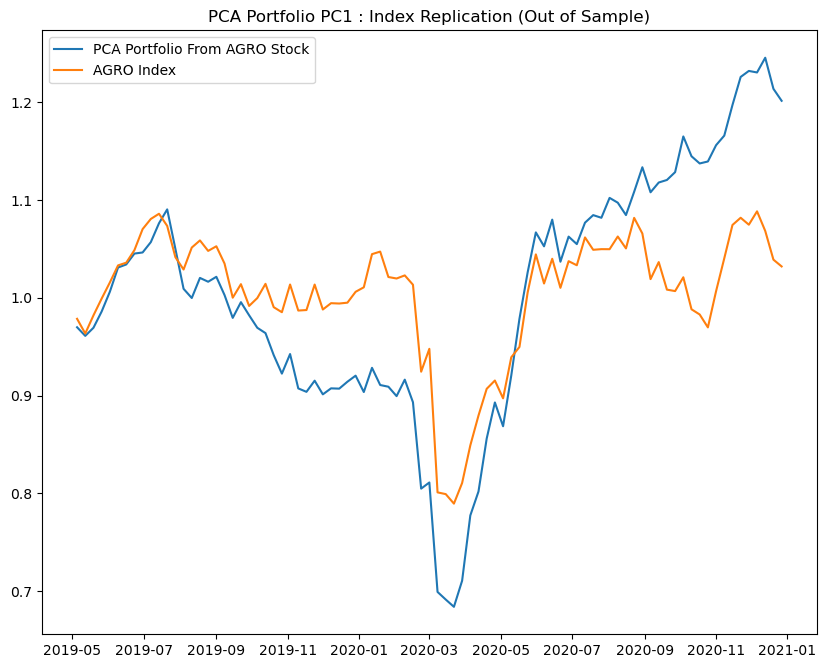

In [406]:

weights = abs(pc1)/sum(abs(pc1))
pca_ret_test = np.sum(weights*X_test, axis = 1)
test_pca_df = pd.concat([pca_ret_test, y_test], 1)
test_pca_df.columns = ["PCA Portfolio From AGRO Stock", "AGRO Index"]

test_pca_cs = test_pca_df.cumsum().apply(np.exp)

plt.figure(figsize=(10,8), dpi=100)
plt.plot(test_pca_cs["PCA Portfolio From AGRO Stock"] , label="PCA Portfolio From AGRO Stock")
plt.plot(test_pca_cs["AGRO Index"], label="AGRO Index")
plt.title("PCA Portfolio PC1 : Index Replication (Out of Sample)")
plt.legend()

In [393]:
set_train = Set_only[Set_only.index < "2019-05-05"]
set_test = Set_only[Set_only.index >= "2019-05-05"]

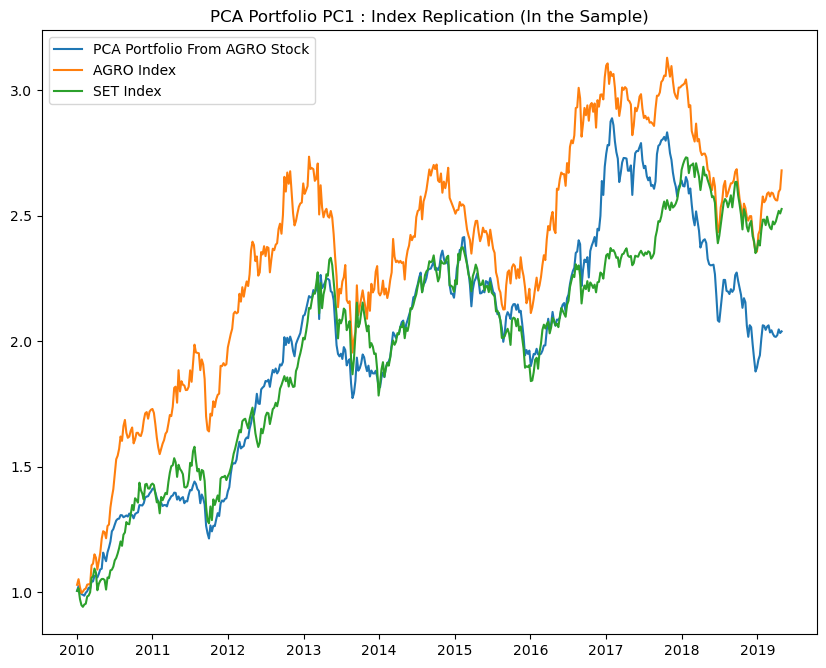

In [405]:

weights = abs(pc1)/sum(abs(pc1))
pca_ret_train = np.sum(weights*X_train, axis = 1)
train_pca_df = pd.concat([pca_ret_train, y_train], 1)
train_pca_df.columns = ["PCA Portfolio From AGRO Stock", "AGRO Index"]

train_pca_cs = train_pca_df.cumsum().apply(np.exp)
plt.figure(figsize=(10,8), dpi=100)
plt.plot(train_pca_cs["PCA Portfolio From AGRO Stock"] , label="PCA Portfolio From AGRO Stock")
plt.plot(train_pca_cs["AGRO Index"], label="AGRO Index")
plt.plot(set_train["Return_Set"].cumsum().apply(np.exp), label="SET Index")
plt.title("PCA Portfolio PC1 : Index Replication (In the Sample)")
plt.legend()

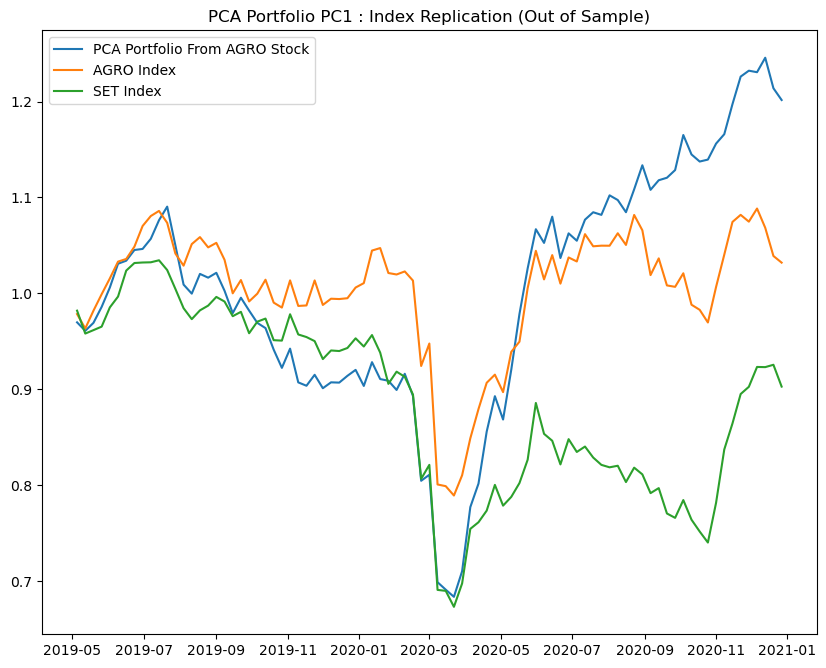

In [404]:

weights = abs(pc1)/sum(abs(pc1))
pca_ret_test = np.sum(weights*X_test, axis = 1)
test_pca_df = pd.concat([pca_ret_test, y_test], 1)
test_pca_df.columns = ["PCA Portfolio From AGRO Stock", "AGRO Index"]

test_pca_cs = test_pca_df.cumsum().apply(np.exp)

plt.figure(figsize=(10,8), dpi=100)
plt.plot(test_pca_cs["PCA Portfolio From AGRO Stock"] , label="PCA Portfolio From AGRO Stock")
plt.plot(test_pca_cs["AGRO Index"], label="AGRO Index")
plt.plot(set_test["Return_Set"].cumsum().apply(np.exp), label="SET Index")
plt.title("PCA Portfolio PC1 : Index Replication (Out of Sample)")
plt.legend()

In [280]:
print("Done")

Done
